# PyInputPlus module

- because writing input validation code for every input() becomes tedious
- contain function similar to input() for different data
- U can set limits for the number, times, timeouts
- 

In [3]:
import pyinputplus

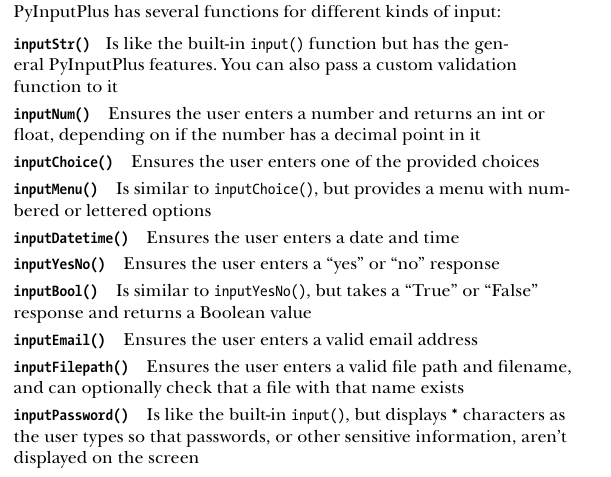

In [5]:
import pyinputplus as pyip

response = pyip.inputNum() # return int or float not string

 five


'five' is not a number.


 3.14


In [6]:
response = pyip.inputInt(prompt='Enter a number')

response

Enter a number

 ten


'ten' is not an integer.
Enter a number

 10


10

In [7]:
help(pyip.inputChoice) # displays help info

Help on function inputChoice in module pyinputplus:

inputChoice(choices, prompt='_default', default=None, blank=False, timeout=None, limit=None, strip=None, allowRegexes=None, blockRegexes=None, applyFunc=None, postValidateApplyFunc=None, caseSensitive=False)
    Prompts the user to enter one of the provided choices.
    Returns the selected choice as a string.

    Run ``help(pyinputplus.parameters)`` for an explanation of the common parameters.

    * ``choices`` (Sequence): A sequence of strings, one of which the user must enter.
    * ``aseSensitive`` (bool): If ``True``, the user must enter a choice that matches the case of the string in choices. Defaults to False.

    >>> import pyinputplus as pyip
    >>> response = pyip.inputChoice(['dog', 'cat'])
    Please select one of: dog, cat
    dog
    >>> response
    'dog'
    >>> response = pyip.inputChoice(['dog', 'cat'])
    Please select one of: dog, cat
    CAT
    >>> response
    'cat'
    >>> response = pyip.inputChoice(['do

## The min, max, greaterThan, lessThan Keyword Arguments

- inputNum(), inputInt(), inputFloat() -> key arguments for specifying a range of valid values

In [8]:
response = pyip.inputNum('Enter num:', min=4)

Enter num:

 2


Number must be at minimum 4.
Enter num:

 4


In [9]:
response = pyip.inputNum('Enter num:', greaterThan = 4)

Enter num:

 3


Number must be greater than 4.
Enter num:

 4


Number must be greater than 4.
Enter num:

 5


## The blank keyword argument
- default -> blank is not allowed, you have to set the argument
- If you want have blank input optional

In [10]:
response = pyip.inputNum('Enter num:', blank=True)

Enter num:

## The limit, timeout, and default Keyword Arguments


In [12]:
response = pyip.inputNum(limit=2) # 2 chances

 dd


'dd' is not a number.


 2


In [14]:
response = pyip.inputNum(timeout=10) # 10 sec waiting

 12


In [17]:
response = pyip.inputNum(limit=2, default='N/A') 
# když to uživatel nedá tak defaultně tam hodí N/A 
# nebude error

 2


## The allowRegexes and blockRegexes Keyword Arguments


In [22]:
response = pyip.inputNum(allowRegexes=[r'(I|V)+',r'zero'])

 zero zero


In [25]:
# specify a list of regular expression you want to block!
# won't accept even numbers

In [24]:
response = pyip.inputNum(blockRegexes=[r'[02468]$'])

 2


This response is invalid.


 5


In [26]:
# you can combine allowRegexes and blockRegexes
response = pyip.inputStr(allowRegexes=[r'caterpillar', 'category'],
                        blockRegexes=[r'cat'])

 catman


This response is invalid.


 cater


This response is invalid.


 caterpillar


## Passing a custom validation function to inputCustom()



In [28]:
def addsUpToTen(numbers):
    numbersList = list(numbers)
    for i, digit in enumerate(numbersList):
        numbersList[i] = int(digit)
    if sum(numbersList) != 10:
        raise Exception('The digits must add up to 10, not %s.' % (sum(numbersList)))
    return int(numbers) # Return an int form of numbers.

In [29]:
response = pyip.inputCustom(addsUpToTen) # no () after

 1


The digits must add up to 10, not 1.


 1,2


invalid literal for int() with base 10: ','


 12


The digits must add up to 10, not 3.


 55
